# Using EDA to clean raw data to clean data 

In [ ]:
import pandas as pd    # importing pandas for data manipulation
import numpy as np     # importing numpy for numerical operations

In [ ]:
emp=pd.read_excel(r'./Rawdata.xlsx')      # loading the data from the excel file

In [ ]:
emp          # prints the dataframe

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [5]:
type(emp)

pandas.core.frame.DataFrame

In [6]:
emp.columns # returns the columns of data frame

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [7]:
emp.shape     # returns the shape of the array

(6, 6)

In [8]:
emp.head()

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year


In [9]:
emp.info()   # prints the information of the first element in the list

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [10]:
emp['Domain']

0     Datascience#$
1           Testing
2    Dataanalyst^^#
3       Ana^^lytics
4        Statistics
5               NLP
Name: Domain, dtype: object

In [12]:
emp.isna().sum()    # it returns the total number of missing values in the column

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [13]:
emp['Name']

0      Mike
1    Teddy^
2     Uma#r
3      Jane
4    Uttam*
5       Kim
Name: Name, dtype: object

- cleaning the name column
- in the syntax \w means word character (equivalent to [a-zA-Z0-9_])
- \s means whitespace (equivalent to [\r\n\t\f\v ])
- \d means digit (equivalent to [0-9])
- \D means not a digit (equivalent to [^0-9])
- \w means word character (equivalent to [a-zA-Z0-9_])
#-to clean data we use the sub function which replaces the pattern with the replacement string  
- regex=True means we are using regular expression to clean the data

| Task | Example Regex | Use   |
| ---- | ------------ | -------|
| Remove special characters | `\W`                        | Cleans names             |
| Find digits only          | `\d+`                       | Extract numbers          |
| Validate email            | `^[\w.-]+@[\w.-]+\.\w{2,}$` | Match proper emails      |
| Find all spaces           | `\s+`                       | Remove extra spaces      |
| Match phone numbers       | `\d{10}`                    | Extract 10-digit numbers |


- Basic Regex Symbols

| Symbol | Meaning                        | Example                    |
| ------ | ------------------------------ | -------------------------- |
| `\d`   | Digit (0–9)                    | `\d{4}` → 4 digits         |
| `\w`   | Word char (a–z, A–Z, 0–9, \_)  |                            |
| `\s`   | Whitespace                     |                            |
| `.`    | Any character (except newline) |                            |
| `+`    | One or more                    | `\d+`                      |
| `*`    | Zero or more                   | `a*`                       |
| `^`    | Start of string                | `^abc` → starts with "abc" |
| `$`    | End of string                  | `abc$` → ends with "abc"   |
| `[]`   | Match any one char inside      | `[aeiou]`                  |
| `[^]`  | Exclude characters inside      | `[^a-z]`                   |


In [ ]:
emp['Name']=emp['Name'].str.replace(r'\W','',regex=True)   
# we used \w for match and replace with empty string to remove all non-alphanumeric characters

In [ ]:
emp['Name']

0     Mike
1    Teddy
2     Umar
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object

In [20]:
emp['Domain']

0     Datascience#$
1           Testing
2    Dataanalyst^^#
3       Ana^^lytics
4        Statistics
5               NLP
Name: Domain, dtype: object

In [21]:
emp['Domain']=emp['Domain'].str.replace(r'\W','',regex=True)

In [22]:
emp['Domain']

0    Datascience
1        Testing
2    Dataanalyst
3      Analytics
4     Statistics
5            NLP
Name: Domain, dtype: object

In [ ]:
#emp['Age']=emp['Age'].str.replace(r'\W','',regex=True)


In [24]:
emp['Age']

0    34years
1       45yr
2        NaN
3        NaN
4       67yr
5       55yr
Name: Age, dtype: object

In [ ]:
emp['Age']=emp['Age'].str.extract('(\\d+)')
# in this syntax we extracted the numeric value from the string using regular expression. The \\d+ means one or more digits.
# if we use \D + it will extract non numeric values. If we use \w+ it will extract alphanumeric values.

In [27]:
emp['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [28]:
emp['Location']=emp['Location'].str.replace(r'\W','')

In [29]:
emp['Location']

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

In [30]:
emp['Salary']

0     5^00#0
1    10%%000
2    1$5%000
3     2000^0
4     30000-
5    6000^$0
Name: Salary, dtype: object

In [ ]:
emp['Salary']=emp['Salary'].str.replace(r'\W','',regex=True)
# we used replace because if we use extract then it will return only the first value
#but in replace we replace all non-numeric values with empty string so it will be numeric.


In [32]:
emp['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: object

In [33]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2+
1,Teddy,Testing,45,Bangalore,10000,<3
2,Umar,Dataanalyst,NaN,NaN,15000,4> yrs
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5+ year
5,Kim,NLP,55,Delhi,60000,10+


In [34]:
emp['Exp']=emp['Exp'].str.extract('(\\d+)')

In [35]:
emp['Exp']

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

In [ ]:
emp
# The existing data is cleaned but we have some null values

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [37]:
clean_data=emp.copy()

In [38]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [39]:
# Filling the null data with the mean of the column

In [ ]:
clean_data['Age']=clean_data['Age'].fillna(np.mean(pd.to_numeric(clean_data['Age'])))

# we use the fillna() function to replace missing values in the 'Age' column with the mean of the column.
# we use the pd.to_numeric() function to convert the 'Age' column to numeric values,so that we can calculate the mean of the column.
# we use the np.mean() function to calculate the mean of the 'Age' column.

# In this syntax we calculate the mean and replace them with the Nan values in the 'Age' column.

In [41]:
clean_data['Age']

0       34
1       45
2    50.25
3    50.25
4       67
5       55
Name: Age, dtype: object

In [43]:
clean_data['Exp']

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

In [44]:
clean_data['Exp']=clean_data['Exp'].fillna(np.mean(pd.to_numeric(clean_data['Exp'])))

In [45]:
clean_data['Exp']

0      2
1      3
2      4
3    4.8
4      5
5     10
Name: Exp, dtype: object

In [ ]:
clean_data['Location'].isnull().sum()
# it returns the null count in the 'Location' column

2

In [ ]:
clean_data['Location']=clean_data['Location'].fillna(clean_data['Location'].mode()[0])
# Location is a categorical data so we used mode() function to fill missing values with the most frequent value in the column.
# With category data the modes takes the first appered values in the case of same frequency values .


In [48]:
clean_data['Location']

0       Mumbai
1    Bangalore
2    Bangalore
3     Hyderbad
4    Bangalore
5        Delhi
Name: Location, dtype: object

In [ ]:
clean_data
# The data is cleaned now .It is ready to be used for analysis and visualization.

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,Bangalore,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [50]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      object
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [ ]:
clean_data['Salary']=clean_data['Salary'].astype(int)
clean_data['Exp']=clean_data['Exp'].astype(int)
clean_data['Age']=clean_data['Age'].astype(int)

# changing the data type to int

In [52]:
clean_data['Name']=clean_data['Name'].astype('category')
clean_data['Domain']=clean_data['Domain'].astype('category')
clean_data['Location']=clean_data['Location'].astype('category')

In [53]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int32   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int32   
 5   Exp       6 non-null      int32   
dtypes: category(3), int32(3)
memory usage: 866.0 bytes


In [54]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [55]:
# clean_data.to_csv('clean_data.csv')

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

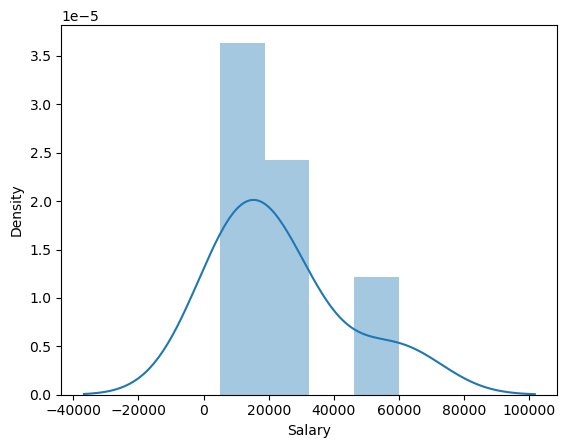

In [58]:
vis1=sns.distplot(clean_data['Salary'])

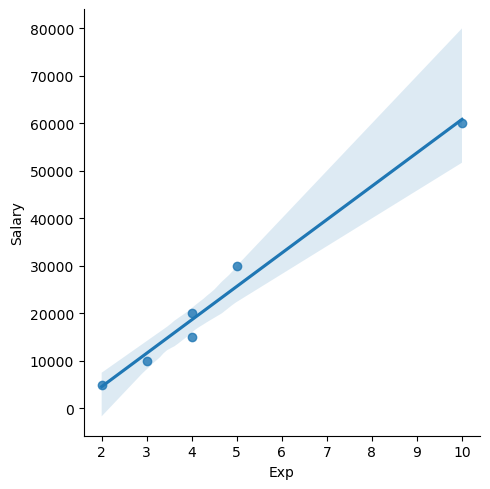

In [77]:
vis2=sns.lmplot(clean_data,x='Exp',y='Salary')

In [60]:
clean_data[:]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [61]:
clean_data[0:6:2]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
2,Umar,Dataanalyst,50,Bangalore,15000,4
4,Uttam,Statistics,67,Bangalore,30000,5


In [62]:
clean_data.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [ ]:
x_iv=clean_data[['Name','Domain','Age','Location','Exp']]    # created a new dataframe with the independent variables

x_dv=clean_data['Salary']   # created a new dataframe with the dependent variable

In [64]:
x_dv

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: int32

In [65]:
x_iv

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [68]:
imputation=pd.get_dummies(clean_data).astype(int)

In [69]:
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,55,60000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


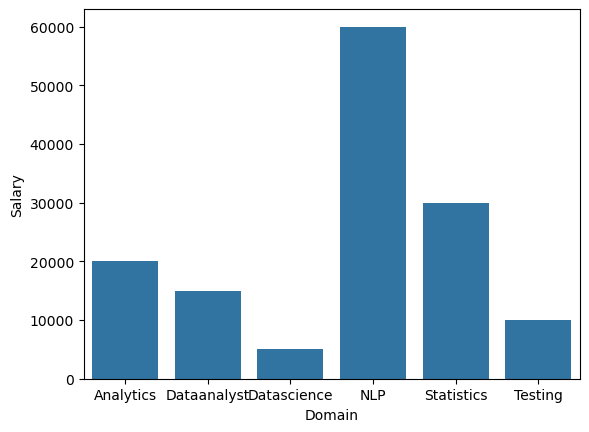

In [ ]:
vis3=sns.barplot(clean_data,x='Domain',y='Salary')
# it shows the salary by domains.

<Axes: xlabel='Salary', ylabel='Density'>

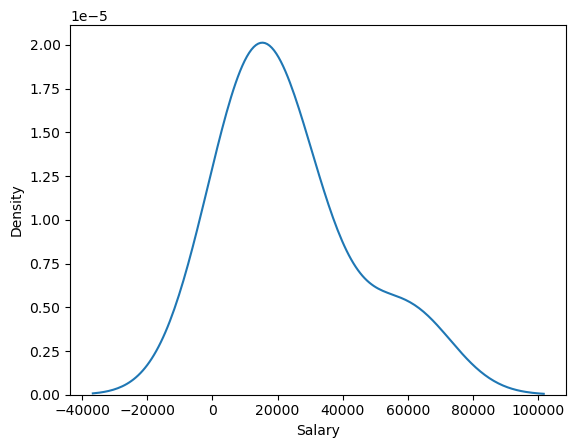

In [72]:
sns.kdeplot(clean_data['Salary'])

<Axes: xlabel='Exp', ylabel='Salary'>

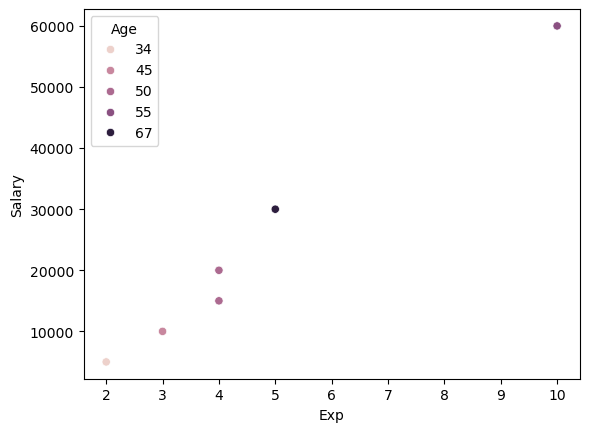

In [74]:
sns.scatterplot(clean_data,x='Exp',y='Salary',hue='Age')

<Axes: >

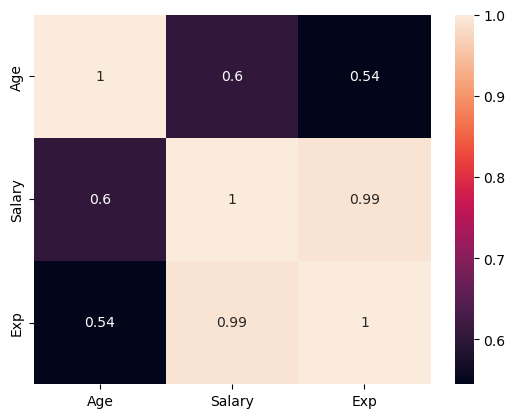

In [75]:
sns.heatmap(clean_data[['Age', 'Salary', 'Exp']].corr(), annot=True)
